# Kaggle Competition:  Iceberg or Ship

# resnext50 architecture 

## start with image size of 75, increase epochs, update size recurrently


---
## Import libraries

In [1]:
!ls -l

total 5216
-rw-rw-r-- 1 ubuntu ubuntu 1405706 Jan 15 01:35 1b_getdata-csv.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  625023 Jan 14 18:47 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  245619 Jan 14 18:36 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   13742 Jan 15 01:35 3_model_resnext50.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   14220 Jan 13 21:14 4_model_nasnet.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   64965 Jan 14 19:40 4_resnext_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  147078 Jan 14 19:57 5_resnet18_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  138629 Jan 14 19:52 6_resnext50_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  205624 Jan 20 20:02 7_1_resnext50_more_epoch_submitted.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  210001 Jan 15 18:51 7_2_resnext50_more_epoch.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  254485 Jan 20 19:51 7_5_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  253300 Jan 20 20:00 7_6_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  255888 Jan 20 20:32 7_7_resnext50_more_epoch_update_sz

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [5]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [6]:
!ls -l {PATH}

total 1973264
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan  9 00:38 models
-rw-rw-r--  1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan 20 20:26 sub
drwxrwxr-x  2 ubuntu ubuntu     274432 Jan 14 18:44 test
-rw-rw-r--  1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 13 ubuntu ubuntu       4096 Jan 15 16:52 tmp
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 train
-rw-rw-r--  1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 valid


In [7]:
np.random.seed(0)

## Set Architecture

In [8]:
arch=resnext50
sz=75
bs=32
lr = 0.008

In [9]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

data = get_data(sz, bs)
data = data.resize(int(sz*1.4), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)

learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.60)

### Learning Rate Finder

In [11]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 59%|█████▊    | 24/41 [00:00<00:00, 24.53it/s, loss=3.83] 


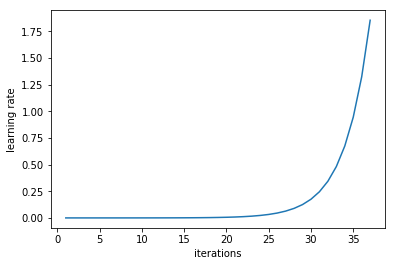

In [12]:
learn.sched.plot_lr()

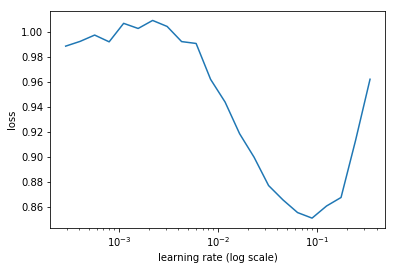

In [13]:
learn.sched.plot() 

In [14]:
learn.fit(lr, 9)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

[0.      0.60992 0.43489 0.81534]                          
[1.      0.56796 0.3976  0.82386]                          
[2.      0.52506 0.47469 0.83239]                          
[3.      0.46932 0.40258 0.83239]                          
[4.      0.44982 0.38229 0.8125 ]                          
[5.      0.44435 0.37619 0.82102]                          
[6.      0.43252 0.39556 0.82671]                          
[7.      0.41325 0.3506  0.82954]                          
[8.      0.37901 0.34603 0.83523]                          



### Stochastic Gradient Descent with Restart

In [15]:
lr = 0.008

In [16]:
#learn.fit(lr, 4, cycle_len=2)
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.51892 0.41547 0.78693]                          
[1.      0.51576 0.38853 0.81534]                          
[2.      0.47061 0.36975 0.82671]                          
[3.      0.47841 0.37381 0.82671]                          
[4.      0.51324 0.41745 0.78693]                          
[5.      0.47833 0.43926 0.78409]                          
[6.      0.46274 0.40687 0.79829]                          
[7.      0.44304 0.42127 0.78977]                          
[8.      0.45277 0.38802 0.81818]                          
[9.      0.46727 0.36643 0.82386]                          
[10.       0.48085  0.39092  0.80114]                      
[11.       0.44643  0.38397  0.80114]                      
[12.       0.44441  0.4096   0.79261]                      
[13.       0.43194  0.38975  0.78977]                      
[14.       0.43695  0.42272  0.78125]                      
[15.       0.4471   0.42024  0.78125]                      
[16.       0.46398  0.42235  0.79261]   

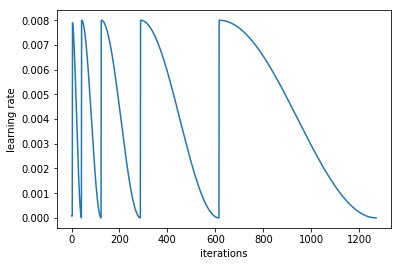

In [17]:
learn.sched.plot_lr()

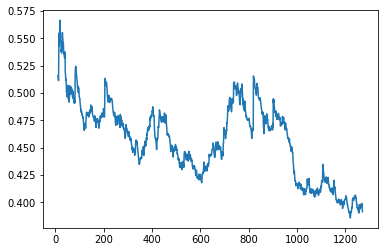

In [18]:
learn.sched.plot_loss()

In [19]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.3407298553304308, 0.8473520249221184)

In [20]:
# lr/10

In [21]:
# lr/9

In [22]:
# lr/3

In [23]:
# lr/4

### Unfreeze Layers

In [24]:
# unfreeze layers
learn.unfreeze()
#lrs = np.array([lr/15,lr/12,lr/9])
lrs = np.array([lr/9,lr/3,lr/1])

#wd = 0.025
#wds=[wd/100, wd/10, wd]
#wds=[0.0025,0.025,0.25]


### Run Learner Again

In [25]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.52746 0.37265 0.80966]                          
[1.      0.50395 0.35462 0.83523]                          
[2.      0.42881 0.36217 0.82386]                          
[3.      0.42782 0.34221 0.84659]                          
[4.      0.46599 0.38182 0.82954]                          
[5.      0.42319 0.31484 0.85227]                          
[6.      0.42589 0.31327 0.84375]                          
[7.      0.4105  0.31536 0.85227]                          
[8.      0.37737 0.34734 0.82671]                          
[9.      0.3548  0.35496 0.84943]                          
[10.       0.36185  0.38588  0.80966]                      
[11.       0.37823  0.37295  0.82386]                      
[12.       0.3672   0.30918  0.85511]                      
[13.       0.37094  0.35044  0.82386]                      
[14.       0.33648  0.37266  0.80682]                      
[15.       0.3208   0.36759  0.81534]                      
[16.       0.34097  0.35632  0.82102]   

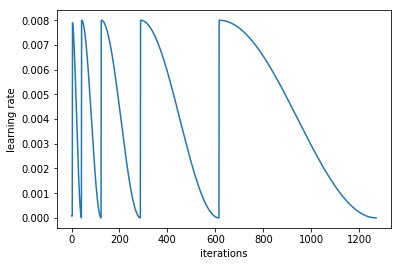

In [26]:
learn.sched.plot_lr()

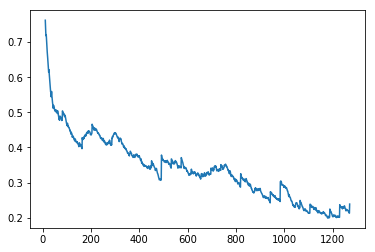

In [27]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [28]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2802335929287739, 0.8785046728971962)

## Resize the images

In [29]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.10)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

## Image Size of 128

In [30]:
#train for image size 128x128
learn.set_data(get_data(128, 16))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.40482 0.32427 0.84821]                          
[1.      0.44267 0.31939 0.86012]                          
[2.      0.41546 0.32422 0.86309]                          
[3.      0.42718 0.37106 0.83333]                          
[4.      0.47738 0.30955 0.86607]                          
[5.      0.42593 0.32309 0.85714]                          
[6.      0.37217 0.30474 0.87202]                          



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.42439 0.35383 0.84226]                          
[1.      0.43771 0.29819 0.86309]                          
[2.      0.3464  0.27763 0.85417]                          
[3.      0.39877 0.2959  0.85714]                          
[4.      0.39098 0.29694 0.88393]                          
[5.      0.39564 0.25884 0.87202]                          
[6.      0.31099 0.27217 0.875  ]                          



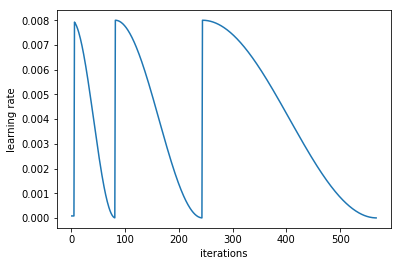

In [31]:
learn.sched.plot_lr()

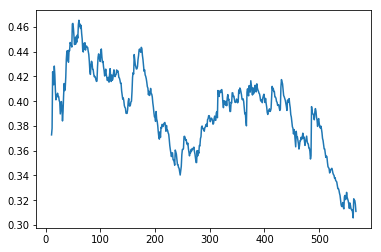

In [32]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [33]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2650696110365182, 0.881619937694704)

In [34]:
learn.save('resnext50_sz75_zm15_sequ_2')
learn.load('resnext50_sz75_zm15_sequ_2')

In [35]:
helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_zm15_sequ_2.csv')

---
## Image Size of 150

In [36]:
#train for image size 150 x 150
learn.set_data(get_data(150, 16))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.31521 0.29194 0.85714]                          
[1.      0.31596 0.2959  0.84524]                          
[2.      0.2983  0.28608 0.85714]                          
[3.      0.30424 0.29717 0.84226]                          
[4.      0.29507 0.29477 0.84524]                          
[5.      0.30773 0.28373 0.86607]                          
[6.      0.28409 0.28883 0.85119]                          



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.29993 0.35029 0.82441]                          
[1.      0.37387 0.30762 0.85119]                          
[2.      0.37264 0.41506 0.80059]                          
[3.      0.38882 0.31058 0.84821]                          
[4.      0.33724 0.28133 0.87798]                          
[5.      0.31353 0.24344 0.89286]                          
[6.      0.25371 0.26301 0.88988]                          



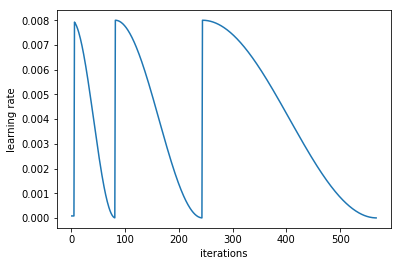

In [37]:
learn.sched.plot_lr()

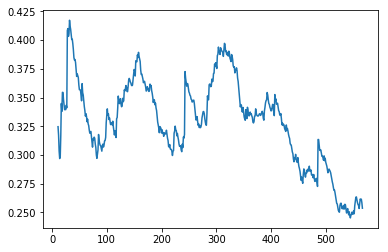

In [38]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [39]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2375287926578384, 0.897196261682243)

---
## Save learner

In [40]:
learn.save('resnext50_sz75_sequ_3')

In [41]:
learn.load('resnext50_sz75_sequ_3')

## Output predictions to csv file

In [42]:
helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_sequ_3.csv')

# END FILE

### Run Learner again

In [50]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.25219 0.28587 0.88691]                          
[1.      0.26291 0.27944 0.88095]                          
[2.      0.25823 0.25685 0.88691]                          
[3.      0.26153 0.32509 0.88691]                          
[4.      0.23211 0.2708  0.89286]                          
[5.      0.29451 0.27043 0.88691]                          
[6.      0.28543 0.23151 0.89286]                          
[7.      0.26281 0.33115 0.85119]                          
[8.      0.21021 0.24593 0.88393]                          
[9.      0.24083 0.27033 0.88095]                          
[10.       0.20909  0.29856  0.88393]                      
[11.       0.24896  0.29928  0.89583]                      
[12.       0.2131   0.262    0.90476]                      
[13.       0.21488  0.29075  0.89286]                      
[14.       0.18296  0.30018  0.88393]                      
[15.       0.19245  0.26058  0.89881]                      
[16.       0.25711  0.24259  0.90476]   

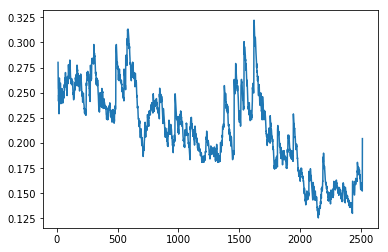

In [51]:
learn.sched.plot_loss()

In [52]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2366688747237264, 0.8940809968847352)

### Run Learner again

In [53]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.17493 0.30694 0.88095]                          
[1.      0.20188 0.30788 0.88393]                          
[2.      0.19147 0.23986 0.90774]                          
[3.      0.23381 0.26251 0.88393]                          
[4.      0.21197 0.25998 0.90179]                          
[5.      0.25343 0.26346 0.90179]                          
[6.      0.18239 0.24298 0.91071]                          
[7.      0.17583 0.30175 0.875  ]                          
[8.      0.27118 0.29667 0.88393]                          
[9.      0.27018 0.31395 0.88095]                          
[10.       0.24892  0.24737  0.91369]                      
[11.       0.2246   0.26077  0.90179]                      
[12.       0.26597  0.28465  0.89583]                      
[13.       0.18942  0.28901  0.90476]                      
[14.       0.16767  0.26106  0.91071]                      
[15.       0.17888  0.27465  0.90179]                      
[16.       0.19827  0.30965  0.88988]   

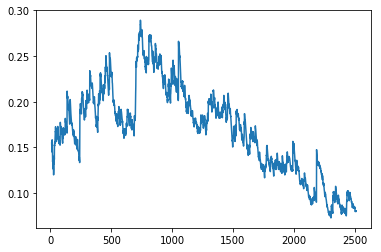

In [54]:
learn.sched.plot_loss()

## Log Loss | Accuracy (final model here)

In [55]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2896609358578895, 0.9065420560747663)

## Save predictions

In [49]:
# test_df = pd.read_json(PATH+"/test.json")
# helper.make_test_file(log_preds,test_df,model_name='resnext50_sz75_zm15_bs32_comp_band',
#                       classes=data.classes,
#                       submission_folder =f'{PATH}sub'
#                      )